C:\Users\91762\AppData\Local\Temp\ipykernel_25968\3074376391.py:45: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line2.set_data(state[i,0],state[i,N])


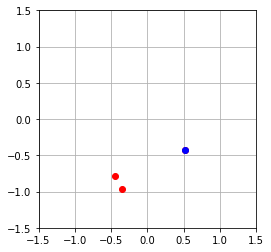

In [24]:
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import odeint

# 2D

N = 3
G = 1.0

posi = [np.random.uniform(-1,1,2) for i in range(N)]
veli = [np.random.uniform(-1,1,2) for i in range(N)]
mass = np.random.uniform(0.1,1,N)


def grav(state,t):
    x = state[:N]
    y = state[N:2*N]
    vx = state[2*N:3*N]
    vy = state[3*N:]
    dx = np.zeros(N)
    dy = np.zeros(N)
    for i in range(N):
        for j in range(N):
            if i!=j:
                dx[i] += G*mass[j]*(x[j]-x[i])/np.hypot(x[j]-x[i],y[j]-y[i])**3  # np.hypot(x,y) = sqrt(x**2+y**2), the distance between two points. np.hypot(x,y)**3 = (x**2+y**2)**(3/2).
                dy[i] += G*mass[j]*(y[j]-y[i])/np.hypot(x[j]-x[i],y[j]-y[i])**3  # It is the acceleration of the particle i due to the particle j.
    return np.concatenate((vx,vy,dx,dy))

state0 = np.concatenate((posi[0],posi[1],veli[0],veli[1]))

t = np.linspace(0,100,1001)
state = odeint(grav,state0,t) # odeint is a function that solves a system of ordinary differential equations given an initial value., in this case the system is the grav function, the initial value is state0, and the time is t.
# also plot the trajectories, along with the movements of the three particles
# in the x-y plane

from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
lim = 4.0
ax.set_xlim(-lim,lim)
ax.set_ylim(-lim,lim)
ax.set_aspect('equal')
ax.grid()
line, = ax.plot([],[],'o',color='r')
line2, = ax.plot([],[],'o',color='b')
line3, = ax.plot([],[],'o',color='g')


# inform about the mass of the particles
for i in range(N):
    ax.text(state0[i],state0[i+N],(mass[i]).__str__()[:4])


def animate(i):
    line.set_data(state[i,:N],state[i,N:2*N])
    line2.set_data(state[i,0],state[i,N])
    line3.set_data(state[i,0],state[i,1])
    return line,line2,line3

ani = FuncAnimation(fig,animate,frames=1001,interval=1,blit=True)
plt.show()
